In [1]:
import torch
import pandas as pd

In [2]:
import sys
sys.path.append("C:\\Users\\rochakd\\Desktop\\daily-project\\HC18US")

In [3]:
from settings import configure_device,set_deterministics
from config import DEVICE,SEED

In [4]:
device = configure_device(DEVICE)
set_deterministics(SEED)
device

<>:48: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:48: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1179013226.py:48: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"  # Replace with your image file
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1179013226.py:49: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"        # Replace with your annotation mask file


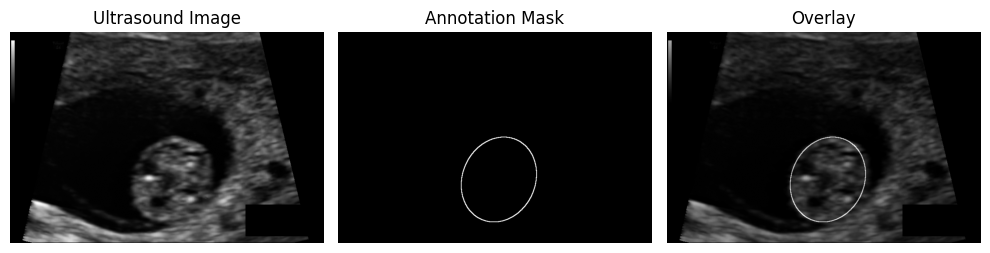

In [5]:
# reading one image and it corresponding mask.abs
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def load_mask(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask

def overlay_mask(image, mask, alpha=0.5):
    color_mask = np.zeros_like(image, dtype=np.uint8)
    color_mask[mask > 0] = 255  # Convert mask to binary and apply color
    overlay = cv2.addWeighted(image, 1 - alpha, color_mask, alpha, 0)
    return overlay

# Visualization
def visualize_image_and_mask(image_path, mask_path):
    image = load_image(image_path)
    mask = load_mask(mask_path)

    overlay = overlay_mask(image, mask)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Ultrasound Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Annotation Mask")
    plt.imshow(mask, cmap='grey')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(overlay, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"  # Replace with your image file
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"        # Replace with your annotation mask file
visualize_image_and_mask(image_path, mask_path)

In [6]:
#Read the circumference of the corresponding file from dataframe
csv_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set_pixel_size_and_HC.csv"
df = pd.read_csv(csv_path)

df.head(1)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3852834320.py:2: SyntaxWarning: invalid escape sequence '\D'
  csv_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set_pixel_size_and_HC.csv"


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.3


In [7]:
pixel_size_value = df.loc[df['filename'] == "000_HC.png", 'pixel size(mm)'].values[0]
print(pixel_size_value)

0.0691358041432


In [8]:
f"{df.iloc[1,0].split(".")[0]}_Annonation.{df.iloc[1,0].split(".")[1]}"

'001_HC_Annonation.png'

In [9]:
df.iloc[2,0].split(".")[0]

'002_HC'

(540, 800, 3)
(540, 800, 3)


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3664010696.py:3: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\3664010696.py:4: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"


(np.float64(-0.5), np.float64(799.5), np.float64(539.5), np.float64(-0.5))

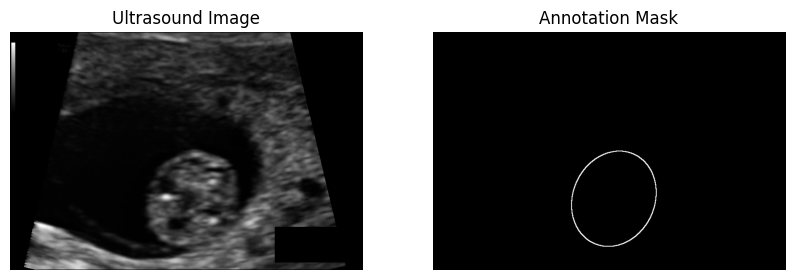

In [19]:
#test shape of image

image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png" 
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"  

img_= cv2.imread(image_path)
mask_path = cv2.imread(mask_path)

print(img_.shape)
print(mask_path.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Ultrasound Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Annotation Mask")
plt.imshow(mask, cmap='grey')
plt.axis('off')


In [24]:
image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png" 
mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"  

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) 

print(image.shape)
print(mask.shape)

image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) / 255.0 
mask = torch.tensor(mask, dtype=torch.long)

print(image.shape)
print(mask.shape)


(540, 800)
(540, 800)
torch.Size([1, 540, 800])
torch.Size([540, 800])


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1441544198.py:1: SyntaxWarning: invalid escape sequence '\D'
  image_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC.png"
C:\Users\rochakd\AppData\Local\Temp\ipykernel_40064\1441544198.py:2: SyntaxWarning: invalid escape sequence '\D'
  mask_path = "C:\\Users\\rochakd\Desktop\\daily-project\\HC18US\\src\\training_set\\000_HC_Annotation.png"
